# Importing Libraries

In [74]:
#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


%matplotlib inline
sns.set()
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
import warnings
warnings.filterwarnings("ignore")

import scipy.stats as st
#import pingouin as pg
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.svm import SVC, NuSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, auc, roc_auc_score, roc_curve, plot_confusion_matrix, classification_report
#from xgboost import XGBClassifier
#from catboost import CatBoostClassifier
from sklearn.metrics import mean_squared_error

from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression, RFE
#from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from statsmodels.api import OLS, add_constant


# EDA

## Description of Variables

In [2]:
# information on the variables
names=f"""ID	ID
Age	age
Gender	gender
Education	level of education
Country	country of current residence
Ethnicity	ethnicity
Nscore	NEO-FFI-R Neuroticism
Escore	NEO-FFI-R Extraversion
Oscore	NEO-FFI-R Openness
Ascore	NEO-FFI-R Agreeableness
Cscore	NEO-FFI-R Conscientiousness
Impulsive	BIS-11 Impulsiveness
SS	ImpSS sensation
Alcohol	alcohol consumption (output attribute)
Amphet	amphetamines consumption (output attribute)
Amyl	amyl nitrite consumption (output attribute)
Benzos	benzodiazepine consumption (output attribute)
Caff	caffeine consumption (output attribute)
Cannabis	cannabis consumption (output attribute)
Choc	chocolate consumption (output attribute)
Coke	cocaine consumption (output attribute)
Crack	crack consumption (output attribute)
Ecstasy	ecstasy consumption (output attribute)
Heroin	heroin consumption (output attribute)
Ketamine	ketamine consumption (output attribute)
Legalh	legal highs consumption (output attribute)
LSD	LSD consumption (output attribute)
Meth	methadone consumption (output attribute)
Mushrooms	magic mushrooms consumption (output attribute)
Nicotine	nicotine consumption (output attribute)
Semer	fictitious drug Semeron consumption (output attribute) Should be removed from our dataset, because of overclaiming observers!
VSA	volatile substance abuse consumption (output attribute)"""

## Downloading the data

In [3]:
# url to the dataset
url=f"https://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data"

In [4]:
# Download dataset with the column titles
def download(url, titles):
    df=pd.read_csv(url, header=None)
    titles = [row.split("\t") for row in titles.split(f"\n")]
    df.columns=pd.DataFrame(titles)[0]
    display(df.info())
    print(f"""Missing Values: """)
    display(df.isna().sum())
    print(f"""Sample of the dataset: """)
    display(df.head())
    return df

In [5]:
df=download(url, names)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1885 non-null   int64  
 1   Age        1885 non-null   float64
 2   Gender     1885 non-null   float64
 3   Education  1885 non-null   float64
 4   Country    1885 non-null   float64
 5   Ethnicity  1885 non-null   float64
 6   Nscore     1885 non-null   float64
 7   Escore     1885 non-null   float64
 8   Oscore     1885 non-null   float64
 9   Ascore     1885 non-null   float64
 10  Cscore     1885 non-null   float64
 11  Impulsive  1885 non-null   float64
 12  SS         1885 non-null   float64
 13  Alcohol    1885 non-null   object 
 14  Amphet     1885 non-null   object 
 15  Amyl       1885 non-null   object 
 16  Benzos     1885 non-null   object 
 17  Caff       1885 non-null   object 
 18  Cannabis   1885 non-null   object 
 19  Choc       1885 non-null   object 
 20  Coke    

None

Missing Values: 


0
ID           0
Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
Ascore       0
Cscore       0
Impulsive    0
SS           0
Alcohol      0
Amphet       0
Amyl         0
Benzos       0
Caff         0
Cannabis     0
Choc         0
Coke         0
Crack        0
Ecstasy      0
Heroin       0
Ketamine     0
Legalh       0
LSD          0
Meth         0
Mushrooms    0
Nicotine     0
Semer        0
VSA          0
dtype: int64

Sample of the dataset: 


,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [6]:
# personality test scores columns
scores= ["Nscore", "Escore", "Oscore", "Ascore", "Cscore", "Impulsive", "SS"]

In [7]:
# groups labels for categorical variables
age_lb=["18-24", "25-34", "35-44", "45-54", "55-64", "65+"]
gender_lb=["Male", "Female"]
education_lb=["Left before 16", "Left at 16", "Left at 17", "Left at 18","Left at Uni", "Certificate/Diploma", "University", "Masters", "PhD"]
country_lb=["USA", "New Zealand", "Other", "Australia",  "Republic of Ireland", "Canada", "UK"]
ethnicity_lb=["Black", "Asian", "White", "Mixed-White/Black", "Other", "Mixed-White/Asian", "Mixed-Black/Asian"]
user_lb=["Non-user", "Drug user"]

### Removing overclaimers from our dataset!

In [8]:
# We found the persons or observations who exagertae about drugs they use so we deleted those observation and at the end we removed the Semer column!
def semer(df):
    display(df.Semer.value_counts())
    df.drop(df[df.Semer!="CL0"].index, axis=0, inplace=True)
    return df.drop(columns="Semer")

In [9]:
df=semer(df)

CL0    1877
CL2       3
CL3       2
CL1       2
CL4       1
Name: Semer, dtype: int64

In [10]:
## transforming the non-numerical columns
def non_num_transform(df):
    output= list(set(df.columns).difference(set(df._get_numeric_data().columns)))
    for o in output:
        le = LabelEncoder()
        df[o] = le.fit_transform(df[o])
    return output

output_attributes=non_num_transform(df)

In [11]:
output_attributes

['VSA',
 'Mushrooms',
 'Heroin',
 'Crack',
 'Ketamine',
 'Coke',
 'Legalh',
 'Cannabis',
 'Choc',
 'Alcohol',
 'Ecstasy',
 'Benzos',
 'Meth',
 'Nicotine',
 'Amyl',
 'Caff',
 'Amphet',
 'LSD']

### Removing ID as non-important Feature!

In [12]:
# removing the ID column from dataset
df.drop(columns="ID", inplace=True)

### Removing Ethnicty with rows non white value, because of dominance of white Ethnicity of Data

In [13]:
#df.drop(df[df.Ethnicity!=-0.31685].index, axis=0, inplace=True)

### Dropping Ethnicity and Country column

In [14]:
# removing the Ethnicty column from dataset
df.drop(columns="Ethnicity", inplace=True)
df.drop(columns="Country", inplace=True)

## Hypothesis:

* Higher Nscore more probabilty of using hard drug.
* Higher Oscore more probabilty of using hard drug.
* lower Ascore more probabilty of using hard drug.
* lower Cscore more probabilty of using hard drug.
* Higher Impulsive more probabilty of using hard drug.
* Higher SS more probabilty of using hard drug.
* Men do more drugs than women.
* Young people use more drugs than older people.
* Low educated people use more drugs than high educated people.

## Defining Hard Drugs:

In [15]:
# define what are hard drugs
hard_drugs=["Amphet", "Benzos", "Coke", "Crack", "Ecstasy", "Heroin", "Legalh", "Meth"]

In [16]:
# encode a new column to identify whether an individual is a hard drug user or not (with frequency>1)
def hard_drug_user(df, hard_drugs):
    df["hard"]=df[df[hard_drugs]>2].any(axis=1)
    print(f"The distribution of hard drug user:")
    display(df.hard.value_counts(normalize=True).round(2))
    print(f"Descriptive summary of the hard drug user vs non user on personality test scores:")
    display(df.groupby("hard").agg(["mean", "std", "median", "min", "max"]).round(2).stack()[["Nscore", "Escore", "Oscore", "Ascore", "Cscore", "Impulsive", "SS"]])
    return df

In [17]:
df=hard_drug_user(df, hard_drugs)

The distribution of hard drug user:


True     0.52
False    0.48
Name: hard, dtype: float64

Descriptive summary of the hard drug user vs non user on personality test scores:


Nscore  Escore  Oscore  Ascore  Cscore  Impulsive    SS
hard                                                                 
False mean     -0.18    0.05   -0.35    0.18    0.30      -0.30 -0.44
      std       0.92    0.92    0.92    0.93    0.91       0.92  0.87
      median   -0.15    0.00   -0.32    0.13    0.26      -0.22 -0.53
      min      -2.76   -2.73   -3.27   -2.90   -2.73      -2.56 -2.08
      max       3.27    2.86    2.90    3.16    3.46       2.90  1.92
True  mean      0.16   -0.05    0.31   -0.17   -0.27       0.28  0.38
      std       1.04    1.06    0.96    1.02    0.99       0.90  0.87
      median    0.22    0.00    0.29   -0.15   -0.28       0.19  0.40
      min      -3.46   -3.27   -2.86   -3.46   -3.46      -2.56 -2.08
      max       3.27    3.27    2.90    3.46    3.01       2.90  1.92

## Value	Description
0 - Never Used

1 - Used over a Decade Ago

2 - Used in Last Decade

3 - Used in Last Year

4 - Used in Last Month

5 - Used in Last Week

6 - Used in Last Day

In [18]:
def plot_demo(df, cat):
    plt.style.use('seaborn-whitegrid')
    graph_name="graph/hard drug user by {}.png"
    sns.set(style="white", font_scale = 1.5)
    for c in cat:
        f, ax = plt.subplots(figsize=(15, 7))
        label=eval(c.lower()+"_lb")
        p=round(pd.pivot_table(df[df.hard==True], values="hard", columns="Gender", index=c, aggfunc="count")/pd.pivot_table(df, values="hard", columns="Gender", index=c, aggfunc="count")*100, 2).reset_index().melt(id_vars=[c])
        g=sns.barplot(x=c, y="value", data=p, hue='Gender', palette=["b","r"])
        g.set_xticklabels(label)
        g.set_ylabel("Hard Drug User Percentage")
        g.set_xlabel(f"{c} Group")
        g.set_title(f"Distribution of Hard Drug User by {c} and Gender")
        for t, l in zip(g.legend().texts, gender_lb): t.set_text(l)
        g.set_xticklabels(g.get_xticklabels(), rotation=15)
        #plt.savefig(graph_name.format(c) , transparent=True)
        plt.show()
    return None

In [19]:
# define categories
cat=["Age", "Education"]

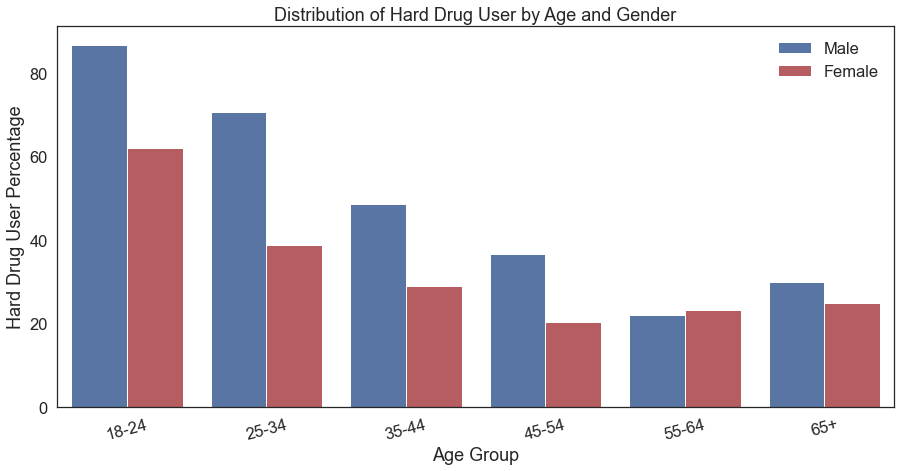

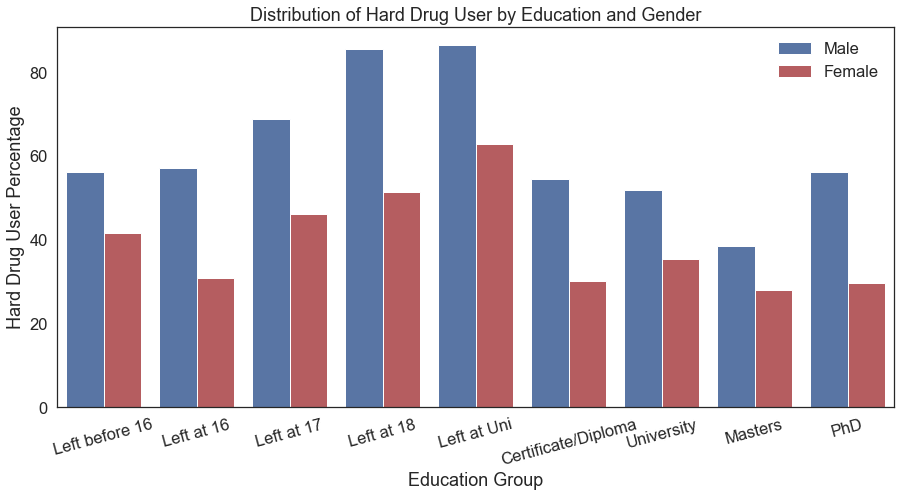

In [20]:
plot_demo(df,cat)

In [21]:
cat = ["Age"]

In [22]:
def plot_demo(df, cat):
    plt.style.use('seaborn-whitegrid')
    graph_name="graph/hard drug user by {}.png"
    sns.set(style="white", font_scale = 1.5)
    for c in cat:
        f, ax = plt.subplots(figsize=(15, 7))
        label=eval(c.lower()+"_lb")
        p=round(pd.pivot_table(df, values="Nscore", columns="hard", index=c, aggfunc="mean"), 5).reset_index().melt(id_vars=[c])
        g=sns.barplot(x=c, y="value", data=p, hue='hard', palette=["b","r"])
        g.set_xticklabels(label)
        g.set_ylabel("Mean of Nscore")
        g.set_xlabel(f"{c} Group")
        g.set_title(f"Variation of mean Nscore by {c} Group and User")
        for t, l in zip(g.legend().texts, user_lb): t.set_text(l)
        g.set_xticklabels(g.get_xticklabels(), rotation=15)
        #plt.savefig(graph_name.format(c) , transparent=True)
        plt.show()
    return None

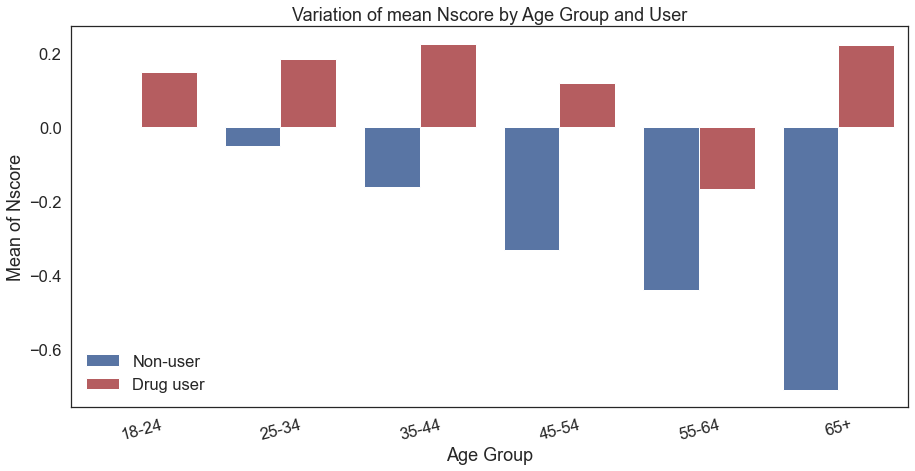

In [23]:
plot_demo(df,cat)

## Modeling:

## Correlation Heatmap

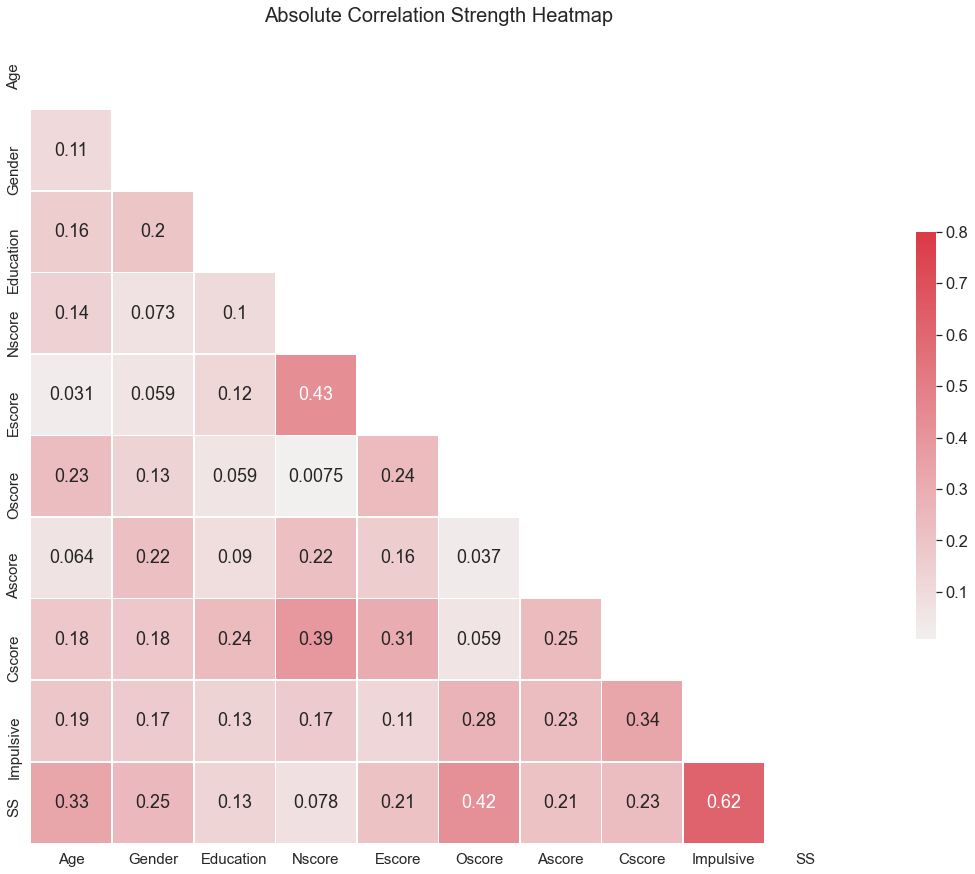

In [24]:
sns.set(style="white", font_scale = 1.5)

# Compute the correlation matrix
corr = abs(df.loc[:, "Age":"SS"].corr())

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, cmap=cmap, vmax=.8, center=0, annot=True, square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Absolute Correlation Strength Heatmap', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("")
plt.ylabel("")
#plt.savefig("graph/correlation.png")
plt.show()

## Splitting the data and creating Models

In [26]:
iv = ['Age', 'Gender', 'Education', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']
dv = ['hard']
X_train, X_test,y_train,y_test = train_test_split(df[iv], df[dv], test_size= 0.3, random_state=14, stratify=df[dv])
y_train=y_train.values.astype(bool).ravel()
y_test=y_test.values.astype(bool).ravel()

In [27]:
model = LogisticRegression(C= 0.001, penalty ='l2', solver= 'newton-cg')

In [43]:
result = model.fit(X_train, y_train)
y_pred=model.predict(X_test)
    
conf=confusion_matrix(y_test, y_pred)
acc=accuracy_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
pr=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

In [29]:
print(acc)

0.7180851063829787


In [103]:
variables = [0,1,2,3,4]

In [104]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
df_scaled = pd.DataFrame(data=X_train_scaled,columns=iv)
pca = PCA(n_components=None)
df_scaled_pca = pca.fit(df_scaled)
X_train_scaled_trans = pca.transform(df_scaled)
X_train_scaled_trans = pd.DataFrame(data=X_train_scaled_trans)

In [105]:
X_train_scaled_trans = X_train_scaled_trans[variables]

In [106]:
X_test_scaled = scaler.transform(X_test)
df_scaled_test = pd.DataFrame(data=X_test_scaled,columns=iv)
X_test_scaled_trans = df_scaled_pca.transform(X_test_scaled)
X_test_scaled_trans = pd.DataFrame(data=X_test_scaled_trans)

In [107]:
X_test_scaled_trans = X_test_scaled_trans[variables]

In [108]:
result = model.fit(X_train_scaled_trans, y_train)

In [109]:
y_pred = result.predict(X_test_scaled_trans)

In [110]:
acc=accuracy_score(y_test,y_pred)
acc

0.725177304964539

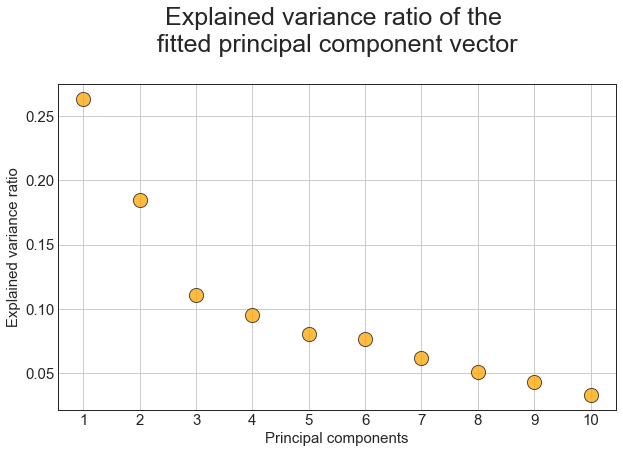

In [87]:
plt.figure(figsize=(10,6))
scatter = plt.scatter(x=[i+1 for i in range(len(df_scaled_pca.explained_variance_ratio_))],
            y=df_scaled_pca.explained_variance_ratio_,
            s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(df_scaled_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

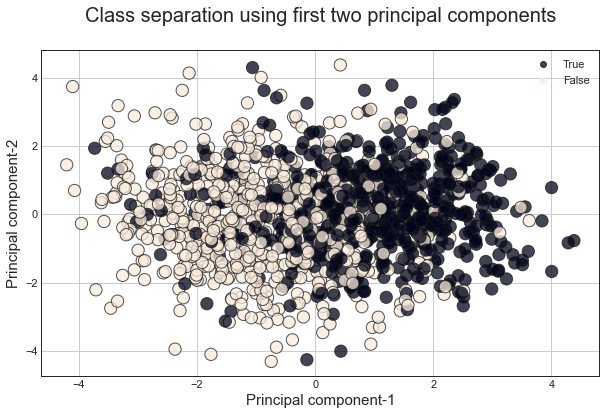

In [90]:
plt.figure(figsize=(10,6))
scatter = plt.scatter(X_train_scaled_trans[0],X_train_scaled_trans[1],c=y_train,edgecolors='k',alpha=0.75,s=150)
classes = ['True', 'False']
plt.legend(handles= scatter.legend_elements()[0], labels=classes)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()

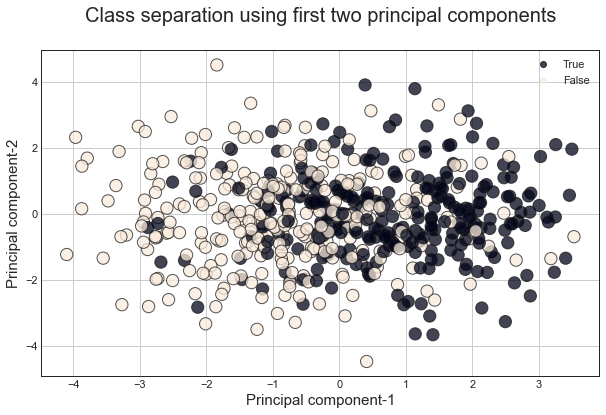

In [94]:
plt.figure(figsize=(10,6))
scatter = plt.scatter(X_test_scaled_trans[0],X_test_scaled_trans[1],c=y_test,edgecolors='k',alpha=0.75,s=150)
classes = ['True', 'False']
plt.legend(handles= scatter.legend_elements()[0], labels=classes)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()

In [111]:
help(pca)

Help on PCA in module sklearn.decomposition._pca object:

class PCA(sklearn.decomposition._base._BasePCA)
 |  PCA(n_components=None, *, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
 |  
 |  Principal component analysis (PCA).
 |  
 |  Linear dimensionality reduction using Singular Value Decomposition of the
 |  data to project it to a lower dimensional space. The input data is centered
 |  but not scaled for each feature before applying the SVD.
 |  
 |  It uses the LAPACK implementation of the full SVD or a randomized truncated
 |  SVD by the method of Halko et al. 2009, depending on the shape of the input
 |  data and the number of components to extract.
 |  
 |  It can also use the scipy.sparse.linalg ARPACK implementation of the
 |  truncated SVD.
 |  
 |  Notice that this class does not support sparse input. See
 |  :class:`TruncatedSVD` for an alternative with sparse data.
 |  
 |  Read more in the :ref:`User Guide <PCA>`.
 |  
 |

In [ ]:
# list of models toa construct
model_list=["LogisticRegression", "SVC", "RandomForestClassifier"]
#"XGBClassifier"

dct={"LogisticRegression": "LogisticRegression(max_iter=1e8)", "SVC": "SVC(probability= True)", "RandomForestClassifier":"RandomForestClassifier()"}

In [ ]:
def fit_model(model, m, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    if m=="CatBoostClassifier":
        y_pred=[eval(i) for i in y_pred]
    conf=confusion_matrix(y_test, y_pred)
    acc=accuracy_score(y_test,y_pred)
    rec=recall_score(y_test,y_pred)
    pr=precision_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)
    #contruct confusion matrix table
    
    np.set_printoptions(precision=2)

    # Plot normalized confusion matrix
    c=pd.DataFrame(conf, columns=["Predicted Non-User", "Predicted User"], index=["Actual Non-User", "Actual User"])
    c.index.name=m
    
    if m!="CatBoostClassifier":
        cm = plot_confusion_matrix(model, X_test, y_test, display_labels=["Non-User", "User"], cmap=plt.cm.Blues, normalize="true")
        cm.ax_.set_title(f"{m} Normalized confusion matrix")
        plt.show()    
    else:
        display(c)
    
    model_roc = roc_auc_score(y_test,  y_pred)
    fpr,tpr,thresholds=roc_curve(y_test, model.predict_proba(X_test)[:,1])
    return [m ,acc.round(2),pr.round(2),rec.round(2),f1.round(2), model_roc.round(2)], [fpr,tpr], c

In [ ]:
def classification_models(models, X_train, X_test, y_train, y_test):
    performance=[]
    ROC=[]
    confusion=[]
    for m in models:
        if m in dct.keys() and type(dct[m])==str:
            model=eval(dct[m])
            p, r, c =fit_model(model, m, X_train, X_test, y_train, y_test)
            performance.append(p)
            ROC.append(r)
            confusion.append(c)
            
        elif m in dct.keys() and type(dct[m])==dict:
            for x in list(dct[m].keys()):
                if x == "KNeighborsClassifier":
                    i=knn_elbow(dct[m][x], X_train, X_test, y_train, y_test)
                    model=eval(dct[m][x].format(i))
                else:
                    model=eval(dct[m][x])
                p, r, c = fit_model(model, x, X_train, X_test, y_train, y_test)
                performance.append(p)
                ROC.append(r)
                confusion.append(c)

        else:
            model=eval(m)()
            p, r, c= fit_model(model, m, X_train, X_test, y_train, y_test)
            performance.append(p)
            ROC.append(r)
            confusion.append(c)
        
    perf=pd.DataFrame(performance, columns=["Model", "Accuracy", "Recall", "Precision", "F1", "ROC"]).set_index("Model")
    display(perf)
    return perf, ROC, confusion

In [ ]:
performance, ROC, confusion = classification_models(model_list, X_train, X_test, y_train, y_test)

## Hyperparameters Tuning Base Models

In [ ]:
# list of models for GridSearch
grid_model_list=["LogisticRegression"]


# parameters for GridSearch
from math import log10, floor
def round_1sf(x):
    return round(x, -int(floor(log10(abs(x)))))
upper = int(round_1sf(X_train.shape[0]**0.5))
grid_dct={"LogisticRegression": dict(solver=['newton-cg', 'lbfgs', 'liblinear'],penalty=['l1','l2'],C=[100, 10, 1.0, 0.1, 0.01, 0.001]), "SVC": dict(kernel=['poly', 'rbf', 'sigmoid'],C=[50, 10, 1.0, 0.1, 0.01],gamma=['scale']),"RandomForestClassifier" : dict(n_estimators=[10, 100, 1000],max_features=['sqrt', 'log2']), "KNeighborsClassifier": dict(n_neighbors=range(1, upper, 2),weights=['uniform', 'distance'],metric=['euclidean', 'manhattan', 'minkowski'])}

In [ ]:
def grid_models(models, parameters, X_train, X_test, y_train, y_test):
    performance=[]
    ROC=[]
    confusion=[]
    for m in models:
        if m=="SVC":
            model=SVC(probability= True)
        elif m=="LogisticRegression":
            model=LogisticRegression(max_iter=1e8)
        else:
            model=eval(m)()
        
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        gs = GridSearchCV(estimator=model, param_grid=parameters[m], n_jobs=-1, cv=cv, scoring='recall',error_score=0, refit=True)
        grid_result = gs.fit(X_train, y_train)
        print("Best for %s: %f using %s" % (m, grid_result.best_score_, grid_result.best_params_))
        y_pred = gs.predict(X_test)
        
        from math import sqrt

        #rms = sqrt(mean_squared_error(y_test, y_pred))
        
        conf=confusion_matrix(y_test, y_pred)
        acc=accuracy_score(y_test,y_pred)
        rec=recall_score(y_test,y_pred)
        pr=precision_score(y_test,y_pred)
        f1=f1_score(y_test,y_pred)
        np.set_printoptions(precision=2)

        # Plot normalized confusion matrix
        c=pd.DataFrame(conf, columns=["Predicted Non-User", "Predicted User"], index=["Actual Non-User", "Actual User"])
        c.index.name=m
        cm = plot_confusion_matrix(gs, X_test, y_test, display_labels=["Non-User", "User"], cmap=plt.cm.Blues, normalize="true")
        cm.ax_.set_title(f"{m} Normalized confusion matrix")
        plt.show()
        
        model_roc = roc_auc_score(y_test,  y_pred)
        fpr,tpr,thresholds=roc_curve(y_test, gs.predict_proba(X_test)[:,1])
        
        plt.style.use('seaborn-whitegrid')
        sns.set(style="white", font_scale = 1)
        graph_name="graph/ROC Grid {}.png"
    
        f, ax = plt.subplots(figsize=(10, 10))
        plt.clf()
        plt.plot(fpr,tpr, label=f'ROC curve={model_roc.round(2)}')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{m} ROC Grid')
        plt.legend(loc="lower right")
        #plt.savefig(graph_name.format(names[i]) , transparent=True)
        plt.show()            
               
        performance.append([m ,acc.round(2),pr.round(2),rec.round(2),f1.round(2), model_roc.round(2)])
        ROC.append([fpr,tpr])
        confusion.append(c)
        
    perf=pd.DataFrame(performance, columns=["Model", "Accuracy", "Recall", "Precision", "F1", "ROC"]).set_index("Model")
    #display(perf)
    return perf, ROC, confusion

In [ ]:
grid_performance, grid_ROC, grid_confusion = grid_models(grid_model_list, grid_dct, X_train, X_test, y_train, y_test)

In [ ]:
model = LogisticRegression(C= 0.001, penalty ='l2', solver= 'newton-cg')

In [ ]:
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
    
conf=confusion_matrix(y_test, y_pred)
acc=accuracy_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
pr=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

In [ ]:
print(rec,pr,acc)

In [ ]:
model = AdaBoostClassifier().fit(X_train, y_train)
importances = model.feature_importances_
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
    
conf=confusion_matrix(y_test, y_pred)
acc=accuracy_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
pr=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

In [ ]:
print(round(rec,4), round(pr,4), round(acc,4))

In [ ]:
import visuals_script as vs
vs.feature_plot(importances, X_train, y_train)